<a href="https://colab.research.google.com/github/MrError10/Heart_Disease_Analysis/blob/main/HeartDiseaseAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mdmahabubjamil","key":"2f61ad7cfeccb55f569d08036b036c15"}'}

In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!kaggle datasets download -d mexwell/heart-disease-dataset

Dataset URL: https://www.kaggle.com/datasets/mexwell/heart-disease-dataset
License(s): Attribution 4.0 International (CC BY 4.0)
100% 399k/399k [00:00<00:00, 1.07MB/s]
100% 399k/399k [00:00<00:00, 1.07MB/s]


In [ ]:
!unzip /content/heart-disease-dataset.zip

Archive:  /content/heart-disease-dataset.zip
  inflating: documentation.pdf       
  inflating: heart_statlog_cleveland_hungary_final.csv  


In [ ]:
data=pd.read_csv("/content/heart_statlog_cleveland_hungary_final.csv")

In [ ]:
data.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [ ]:
data.columns.values

array(['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope', 'target'], dtype=object)

In [ ]:
questions = ["1. How many people have heart disease and how many people doesn't have heart disease? ",
             "2. People of which sex has most heart disease?",
             "3. People of which sex has which type of chest pain most?",
             "4. People with which chest pain are most pron to have heart disease?",
             "5. Age vs Maximum heart rate when people have heart disease.",
             "6. Age vs Maximum heart rate when people doesn't have heart disease.",
             "7. Age vs serum cholestoral when people have heart disease.",
             "8 Age vs serum cholestoral when people doesn't have heart disease.",
             "9. People of which sex has more exercise induced angina?",
             "10. Which sex of people has more fasting blood sugar > 120 mg/dl?"
            ]

In [ ]:
questions

["1. How many people have heart disease and how many people doesn't have heart disease? ",
 '2. People of which sex has most heart disease?',
 '3. People of which sex has which type of chest pain most?',
 '4. People with which chest pain are most pron to have heart disease?',
 '5. Age vs Maximum heart rate when people have heart disease.',
 "6. Age vs Maximum heart rate when people doesn't have heart disease.",
 '7. Age vs serum cholestoral when people have heart disease.',
 "8 Age vs serum cholestoral when people doesn't have heart disease.",
 '9. People of which sex has more exercise induced angina?',
 '10. Which sex of people has more fasting blood sugar > 120 mg/dl?']

In [ ]:
data.target.value_counts()

target
1    629
0    561
Name: count, dtype: int64

# Showing the analysis using chart

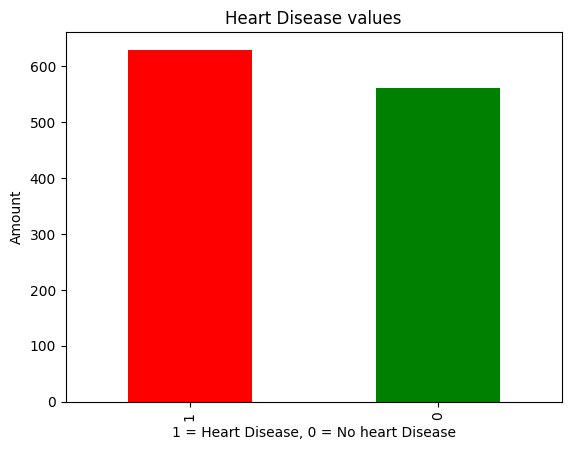

In [ ]:
data.target.value_counts().plot(kind = 'bar', color=["red", "green"])
plt.title("Heart Disease values")
plt.xlabel("1 = Heart Disease, 0 = No heart Disease")
plt.ylabel("Amount");

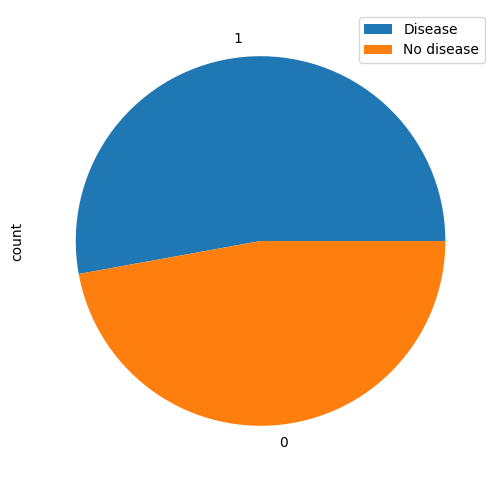

In [ ]:
data.target.value_counts().plot(kind = 'pie', figsize = (8, 6))
plt.legend(["Disease", "No disease"]);

In [ ]:
data.sex.value_counts()

sex
1    909
0    281
Name: count, dtype: int64

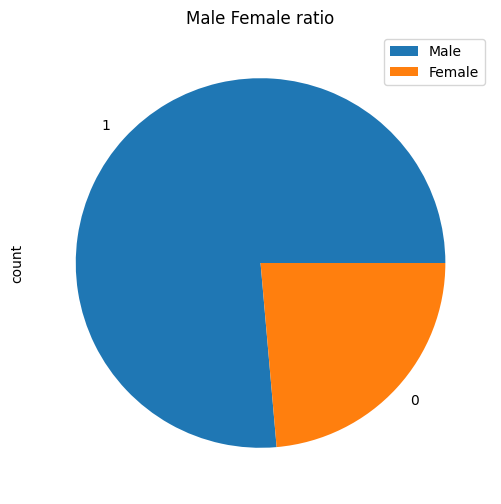

In [ ]:
data.sex.value_counts().plot(kind = 'pie', figsize = (8, 6))
plt.title('Male Female ratio')
plt.legend(['Male', 'Female']);

In [ ]:
pd.crosstab(data.target, data.sex)

sex,0,1
target,,
0,211,350
1,70,559


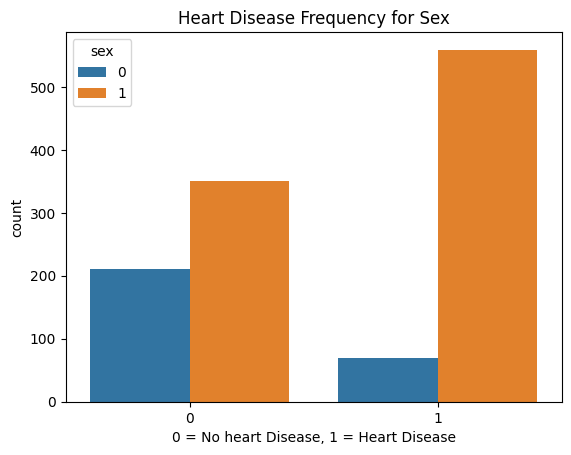

In [ ]:
sns.countplot(x = 'target', data = data, hue = 'sex')
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No heart Disease, 1 = Heart Disease");

In [ ]:
chest_pain_counts = data['chest pain type'].value_counts()
print(chest_pain_counts)

chest pain type
4    625
3    283
2    216
1     66
Name: count, dtype: int64


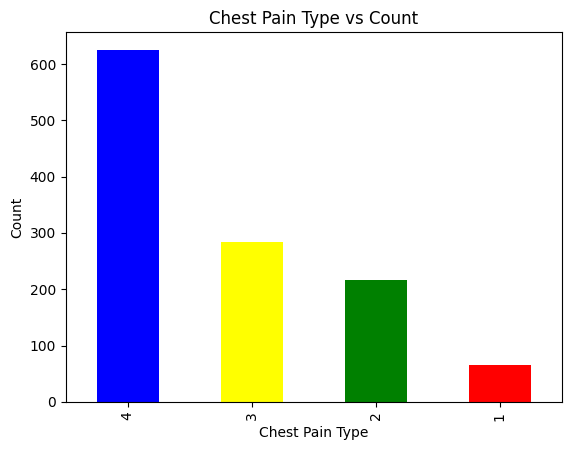

In [ ]:
data['chest pain type'].value_counts().plot(kind='bar', color=['blue', 'yellow', 'green', 'red'])
plt.title('Chest Pain Type vs Count')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.show()

In [ ]:
cross_tab = pd.crosstab(data['sex'], data['chest pain type'])
print(cross_tab)

chest pain type   1    2    3    4
sex                               
0                14   77   85  105
1                52  139  198  520


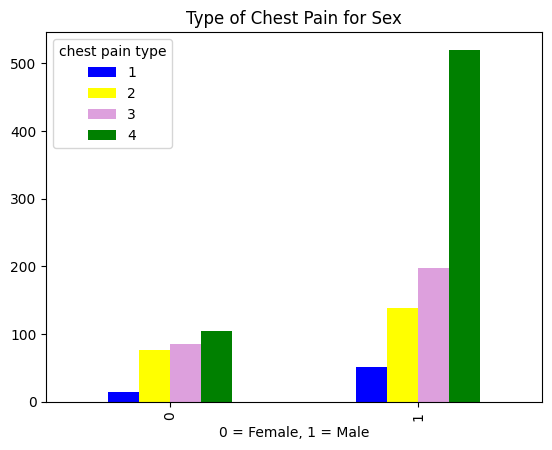

In [ ]:
pd.crosstab(data['sex'], data['chest pain type']).plot(kind='bar', color=['blue', 'yellow', 'plum', 'green'])
plt.title('Type of Chest Pain for Sex')
plt.xlabel('0 = Female, 1 = Male')
plt.show()

In [ ]:
cross_tab = pd.crosstab(data['chest pain type'], data['target'])
print(cross_tab)

target             0    1
chest pain type          
1                 41   25
2                185   31
3                193   90
4                142  483


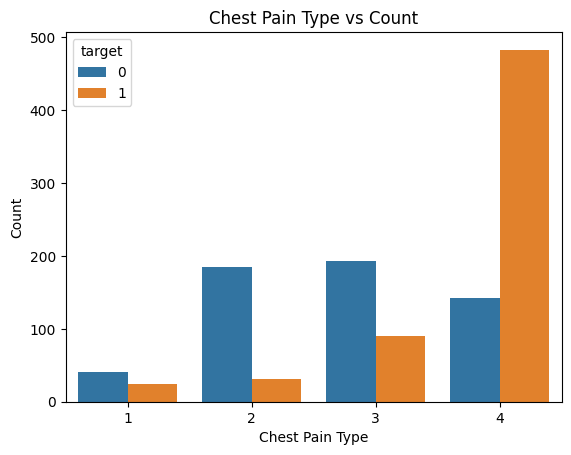

In [ ]:
sns.countplot(x='chest pain type', data=data, hue='target')
plt.title('Chest Pain Type vs Count')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.show()

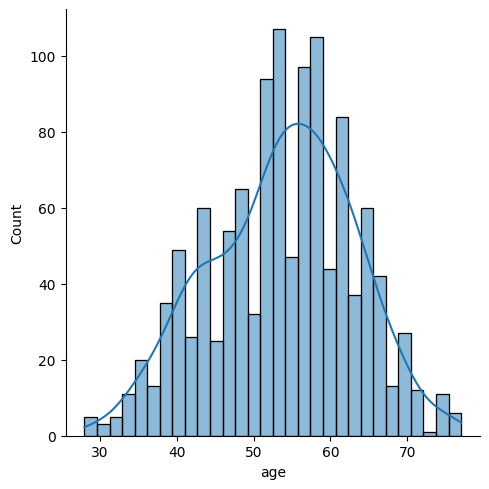

In [ ]:
sns.displot( x = 'age', data = data, bins = 30, kde = True);

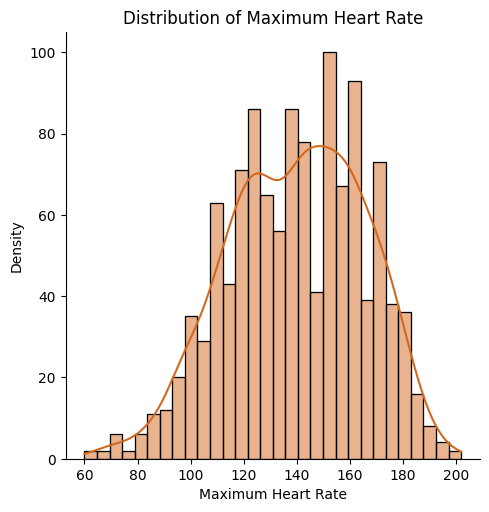

In [ ]:
sns.displot(x='max heart rate', data=data, bins=30, kde=True, color='chocolate')
plt.title('Distribution of Maximum Heart Rate')
plt.xlabel('Maximum Heart Rate')
plt.ylabel('Density')
plt.show()

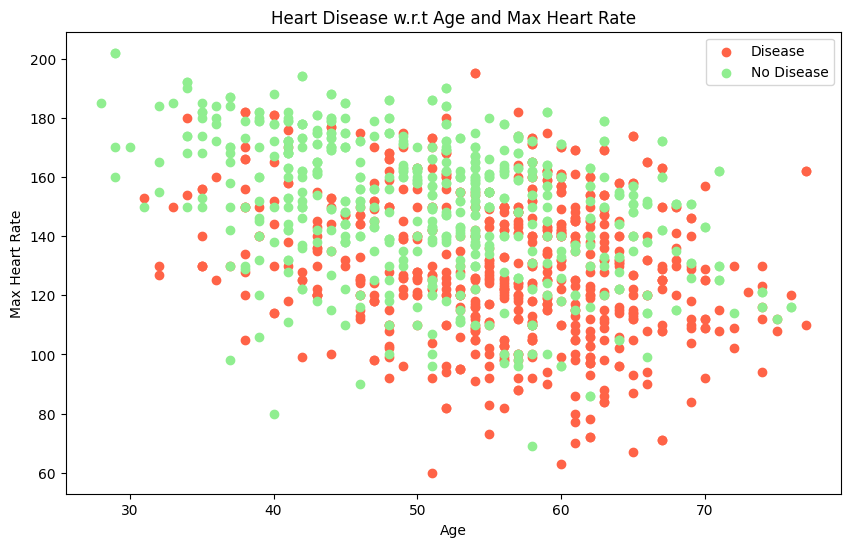

In [ ]:
plt.figure(figsize=(10, 6))

# Plotting the values for people who have heart disease
plt.scatter(data.age[data.target == 1],
            data['max heart rate'][data.target == 1],
            c="tomato", label="Disease")

# Plotting the values for people who don't have heart disease
plt.scatter(data.age[data.target == 0],
            data['max heart rate'][data.target == 0],
            c="lightgreen", label="No Disease")

# Adding info
plt.title("Heart Disease w.r.t Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend()
plt.show()

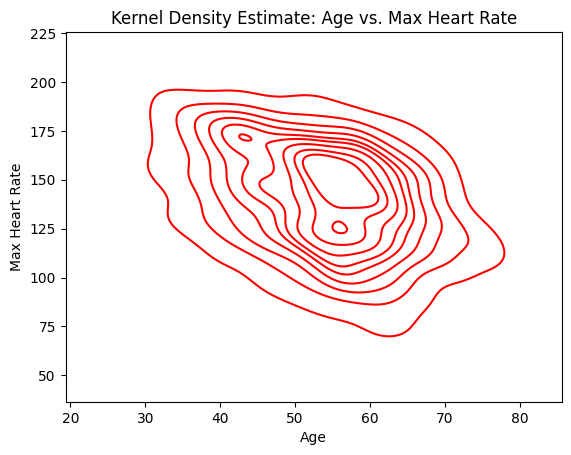

In [ ]:
sns.kdeplot(x='age', y='max heart rate', data=data, color='red')
plt.title('Kernel Density Estimate: Age vs. Max Heart Rate')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.show()

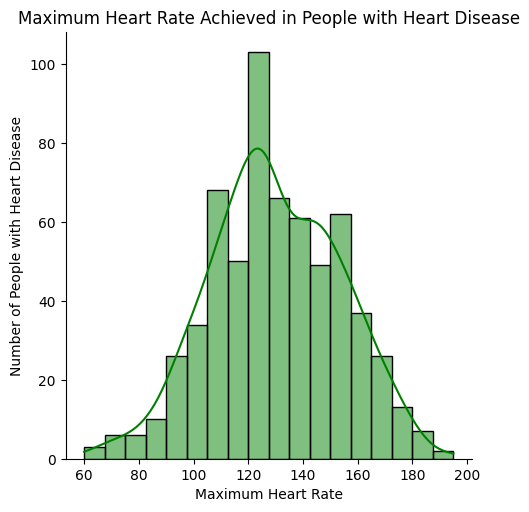

In [ ]:
sns.displot(x=data['max heart rate'][data.target == 1], data=data, kde=True, color='green')
plt.title("Maximum Heart Rate Achieved in People with Heart Disease")
plt.xlabel("Maximum Heart Rate")
plt.ylabel("Number of People with Heart Disease")
plt.show()

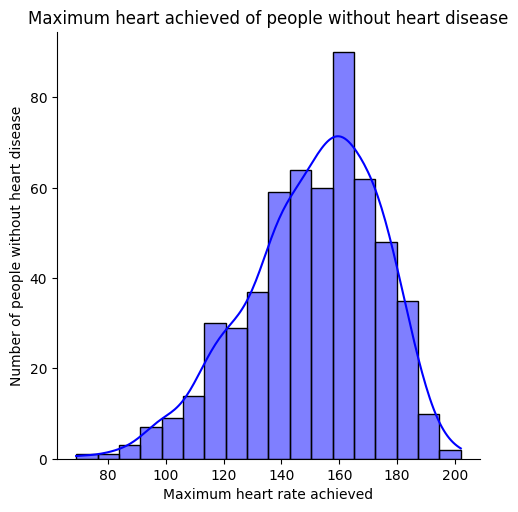

In [ ]:
sns.displot(x = data['max heart rate'][data.target==0], data = data, kde = True, color= 'blue')
plt.title("Maximum heart achieved of people without heart disease")
plt.xlabel("Maximum heart rate achieved")
plt.ylabel("Number of people without heart disease");

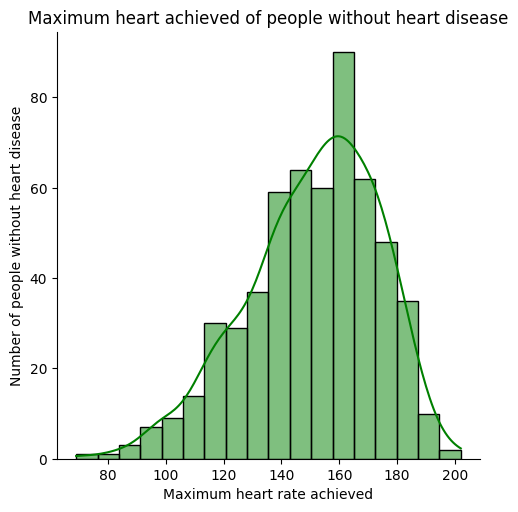

In [ ]:
sns.displot(x = data['max heart rate'][data.target==0], data = data, kde = True, color= 'green')
plt.title("Maximum heart achieved of people without heart disease")
plt.xlabel("Maximum heart rate achieved")
plt.ylabel("Number of people without heart disease");

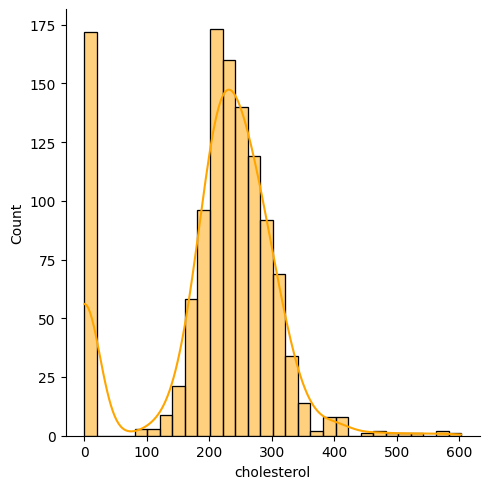

In [ ]:
sns.displot(x = 'cholesterol', data = data, bins = 30, kde = True, color = 'orange');

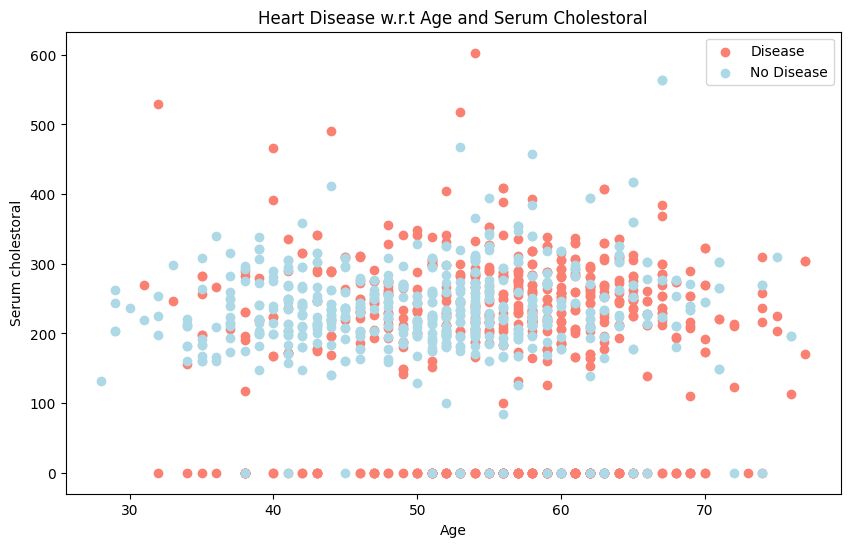

In [ ]:
plt.figure(figsize=(10,6))

plt.scatter(data.age[data.target==1],
            data.cholesterol[data.target==1],
            c="salmon")
plt.scatter(data.age[data.target==0],
            data.cholesterol[data.target==0],
            c="lightblue")
plt.title("Heart Disease w.r.t Age and Serum Cholestoral")
plt.xlabel("Age")
plt.legend(["Disease", "No Disease"])
plt.ylabel("Serum cholestoral");

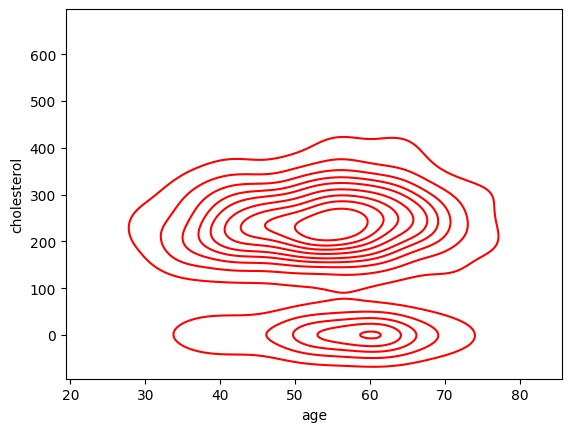

In [ ]:
sns.kdeplot(x = 'age', y = 'cholesterol', data = data, color = 'red');

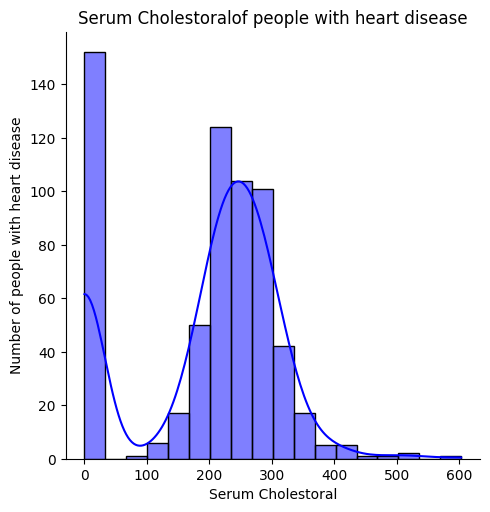

In [ ]:
sns.displot(x = data.cholesterol[data.target==1], data = data, kde = True, color= 'blue')
plt.title("Serum Cholestoralof people with heart disease")
plt.xlabel("Serum Cholestoral")
plt.ylabel("Number of people with heart disease");

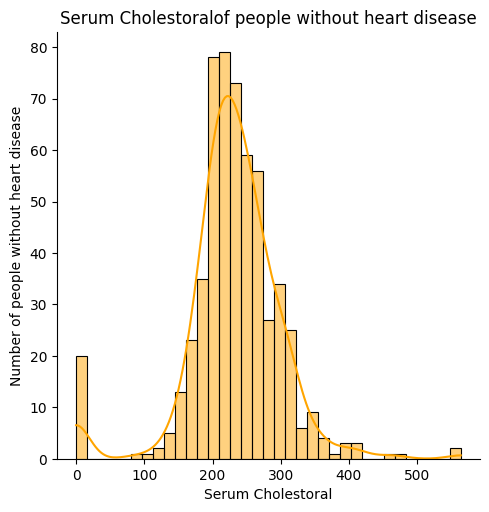

In [ ]:
sns.displot(x = data.cholesterol[data.target==0], data = data, kde = True, color= 'orange')
plt.title("Serum Cholestoralof people without heart disease")
plt.xlabel("Serum Cholestoral")
plt.ylabel("Number of people without heart disease");

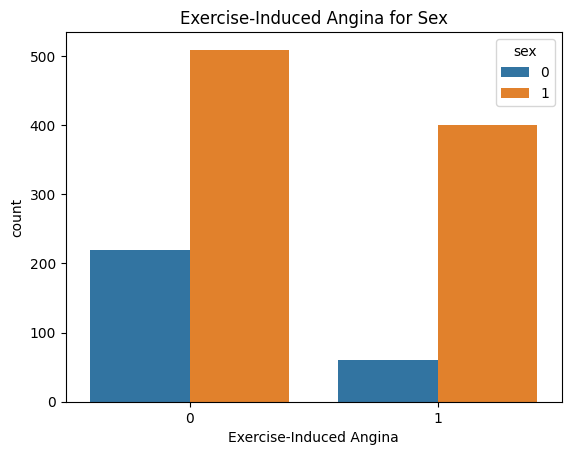

In [ ]:
sns.countplot(x='exercise angina', data=data, hue='sex')
plt.title('Exercise-Induced Angina for Sex')
plt.xlabel('Exercise-Induced Angina')
plt.show()

In [ ]:
data['fasting blood sugar'].value_counts()

fasting blood sugar
0    936
1    254
Name: count, dtype: int64

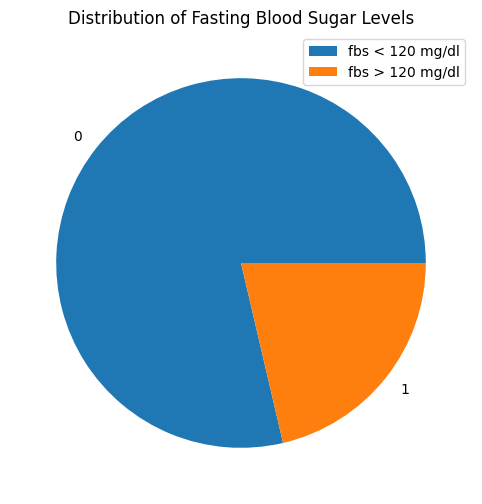

In [ ]:
data['fasting blood sugar'].value_counts().plot(kind='pie', figsize=(8, 6))
plt.legend(['fbs < 120 mg/dl', 'fbs > 120 mg/dl'])
plt.title('Distribution of Fasting Blood Sugar Levels')
plt.ylabel('')
plt.show()

In [ ]:
cross_tab = pd.crosstab(data['sex'], data['fasting blood sugar'])
print(cross_tab)

fasting blood sugar    0    1
sex                          
0                    244   37
1                    692  217


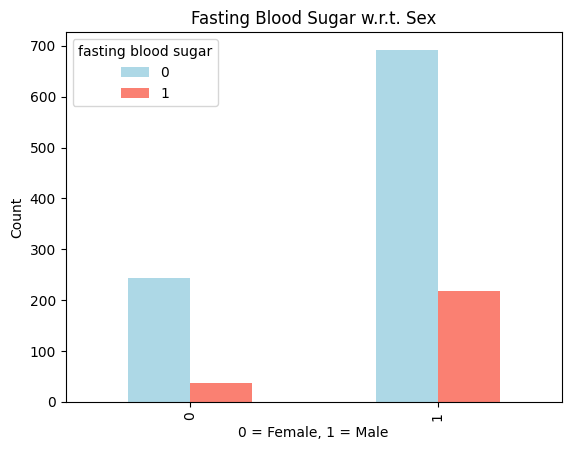

In [ ]:
pd.crosstab(data['sex'], data['fasting blood sugar']).plot(kind='bar', color=['lightblue', 'salmon'])
plt.title("Fasting Blood Sugar w.r.t. Sex")
plt.xlabel("0 = Female, 1 = Male")
plt.ylabel("Count")
plt.show()